# Modeling

## Installing Libraries

In [1]:
!python -m pip install --upgrade pip --user
!python -m pip install --upgrade statsmodels --user
!python -m pip install --upgrade sklearn --user
!python -m pip install --upgrade pmdarima --user
!python -m pip install --upgrade seaborn --user

     |████████████████████████████████| 292 kB 12.1 MB/s            


# Auto Arima evaluation

predicted=12818.822887, expected=32988.000000
predicted=13010.315520, expected=2400.000000
predicted=12910.881150, expected=18768.000000
predicted=12967.239895, expected=18660.000000
predicted=13017.354999, expected=26184.000000
predicted=13134.302470, expected=15384.000000
predicted=13155.913901, expected=7200.000000
predicted=13106.599339, expected=20004.000000
predicted=13164.856491, expected=22368.000000
predicted=13246.033185, expected=22224.000000
predicted=13324.166551, expected=18840.000000
predicted=13371.395270, expected=35460.000000
predicted=13560.545340, expected=23568.000000
predicted=13645.182689, expected=9600.000000
predicted=13611.144220, expected=1200.000000
predicted=13508.727094, expected=19968.000000
predicted=13561.090909, expected=4800.000000
predicted=13487.213102, expected=5820.000000
predicted=13427.183683, expected=29424.000000
predicted=13555.862480, expected=9600.000000
predicted=13524.267485, expected=32952.000000
predicted=13678.477599, expected=8184.000

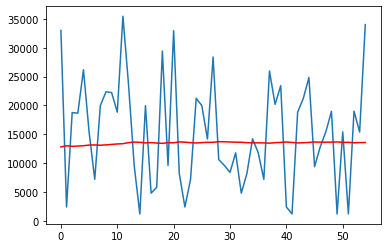

In [2]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('df_salestop1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('D')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Auto Arima Forecast

# Forecating

In [3]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('df_salestop1.csv', names=['TOTALPRICE'], header = 0)

model_autoarima = pm.auto_arima(series.TOTALPRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoarima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3554.882, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3433.358, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3503.069, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3407.884, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3400.250, Time=0.39 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3395.902, Time=1.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3389.173, Time=2.40 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=3384.894, Time=3.19 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=inf, Time=13.59 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3366.616, Time=6.21 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=3.99 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=9.70 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=2.50 sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=inf, Time=12.71

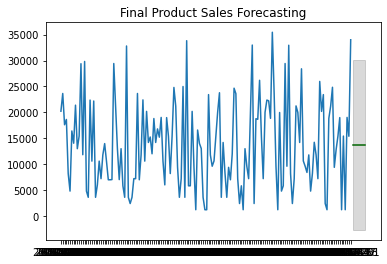

In [4]:
import numpy as np
# Forecast
n_periods = 8
fc, confint = model_autoarima.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(series.TOTALPRICE), len(series.TOTALPRICE)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(series.TOTALPRICE)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Product Sales Forecasting")
plt.show()

## Transformations

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_sqrt = np.sqrt(series['TOTALPRICE'])

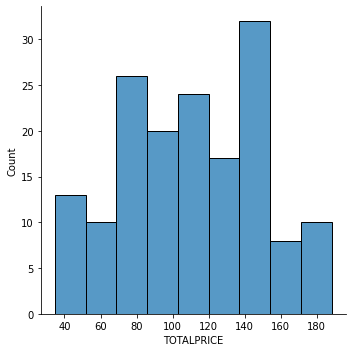

In [7]:
sns.displot(data_sqrt)

In [8]:
data_log = np.log(series['TOTALPRICE'])

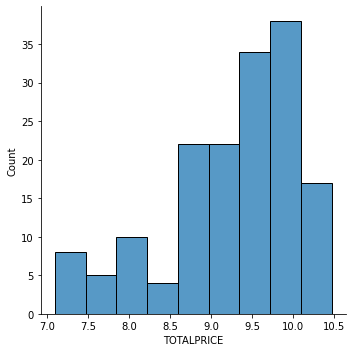

In [9]:
sns.displot(data_log)

In [10]:
from scipy import stats
data_box, fitted_lambda = stats.boxcox(series['TOTALPRICE'])

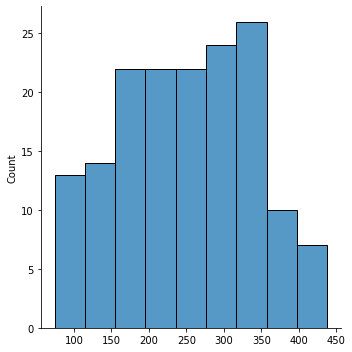

In [11]:
sns.displot(data_box)

## RE-Train the model with data transformed

In [12]:
series_transform = read_csv('df_salestop1.csv')
series_transform['TOTALPRICE'] = np.sqrt(series_transform['TOTALPRICE'])
series_transform.to_csv('df_salestop1_transform.csv', header=1, index=False)
series_transform

ORDERDATE  TOTALPRICE
0    2017-09-02  142.197046
1    2017-09-03  153.753049
2    2017-09-04  132.680066
3    2017-09-05  136.469777
4    2017-09-06   90.465463
..          ...         ...
155  2018-02-25  124.177293
156  2018-02-26   34.641016
157  2018-02-27  137.913016
158  2018-02-28  124.032254
159  2018-03-01  184.412581

[160 rows x 2 columns]

predicted=107.492673, expected=181.625989
predicted=108.192044, expected=48.989795
predicted=107.638741, expected=136.996350
predicted=107.910584, expected=136.601611
predicted=108.173797, expected=161.814709
predicted=108.661446, expected=124.032254
predicted=108.799922, expected=84.852814
predicted=108.586108, expected=141.435498
predicted=108.876812, expected=149.559353
predicted=109.233675, expected=149.077161
predicted=109.580139, expected=137.258879
predicted=109.818747, expected=188.308258
predicted=110.489600, expected=153.518728
predicted=110.854255, expected=97.979590
predicted=110.746064, expected=34.641016
predicted=110.111855, expected=141.308174
predicted=110.369676, expected=69.282032
predicted=110.032892, expected=76.288924
predicted=109.758551, expected=171.534253
predicted=110.256742, expected=97.979590
predicted=110.158524, expected=181.526858
predicted=110.724940, expected=90.465463
predicted=110.565416, expected=48.989795
predicted=110.084356, expected=84.852814
pr

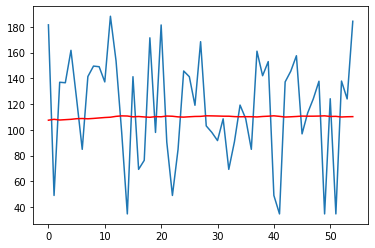

In [13]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('df_salestop1_transform.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('D')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [14]:
series = pd.read_csv('df_salestop1_transform.csv', names=['TOTALPRICE'], header = 0)
series

TOTALPRICE
2017-09-02  142.197046
2017-09-03  153.753049
2017-09-04  132.680066
2017-09-05  136.469777
2017-09-06   90.465463
...                ...
2018-02-25  124.177293
2018-02-26   34.641016
2018-02-27  137.913016
2018-02-28  124.032254
2018-03-01  184.412581

[160 rows x 1 columns]

In [15]:
model_autoarima = pm.auto_arima(series.TOTALPRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoarima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1980.129, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1716.383, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1870.908, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1686.428, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1676.484, Time=0.59 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1671.332, Time=0.69 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=1.70 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=3.70 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=2.10 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=5.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1627.538, Time=2.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1626.443, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1625.306, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1623.428, Time=0

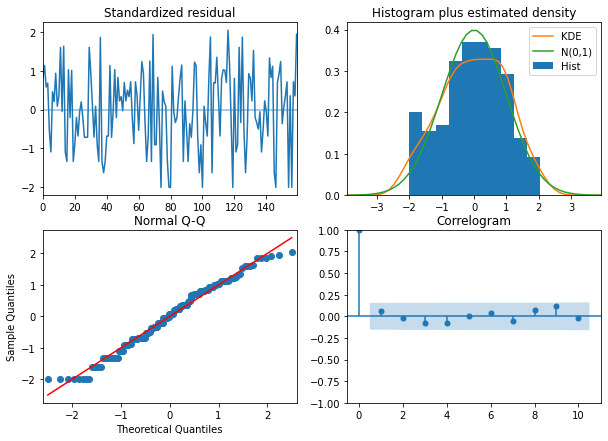

In [16]:
model_autoarima.plot_diagnostics(figsize=(10,7))
plt.show()

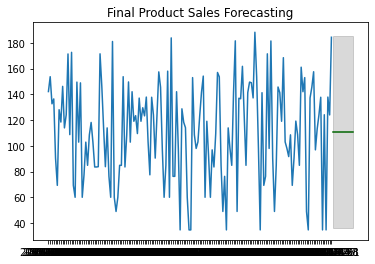

In [17]:
import numpy as np
# Forecast
n_periods = 12
fc, confint = model_autoarima.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(series.TOTALPRICE), len(series.TOTALPRICE)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(series.TOTALPRICE)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Product Sales Forecasting")
plt.show()

## Aggregate the dataset by week

In [18]:
series_byweek= read_csv('df_salestop1.csv')
series_byweek.head()

ORDERDATE  TOTALPRICE
0  2017-09-02       20220
1  2017-09-03       23640
2  2017-09-04       17604
3  2017-09-05       18624
4  2017-09-06        8184

In [19]:
series_byweek['ORDERDATE'] = pd.to_datetime(series_byweek['ORDERDATE'])
series_byweek = series_byweek.set_index('ORDERDATE') 
series_byweek_sales = series_byweek.TOTALPRICE.resample('W').sum()
series_byweek_sales['weekly'] = series_byweek.TOTALPRICE.resample('W').transform('sum')

In [20]:
series_byweek_sales

ORDERDATE
2017-09-03 00:00:00                                                43860
2017-09-10 00:00:00                                               101040
2017-09-17 00:00:00                                                99432
2017-09-24 00:00:00                                                67140
2017-10-01 00:00:00                                                60120
2017-10-08 00:00:00                                                91800
2017-10-15 00:00:00                                                61212
2017-10-22 00:00:00                                                60408
2017-10-29 00:00:00                                                94596
2017-11-05 00:00:00                                               100596
2017-11-12 00:00:00                                                82740
2017-11-19 00:00:00                                                70008
2017-11-26 00:00:00                                                75072
2017-12-03 00:00:00                      

In [21]:
type(series_byweek_sales)

pandas.core.series.Series

In [22]:
series_byweek_sales = series_byweek_sales.to_frame()

In [23]:
type(series_byweek_sales)

pandas.core.frame.DataFrame

In [24]:
series_byweek_sales = series_byweek_sales[:-1]

In [25]:
series_byweek_sales

TOTALPRICE
ORDERDATE                     
2017-09-03 00:00:00      43860
2017-09-10 00:00:00     101040
2017-09-17 00:00:00      99432
2017-09-24 00:00:00      67140
2017-10-01 00:00:00      60120
2017-10-08 00:00:00      91800
2017-10-15 00:00:00      61212
2017-10-22 00:00:00      60408
2017-10-29 00:00:00      94596
2017-11-05 00:00:00     100596
2017-11-12 00:00:00      82740
2017-11-19 00:00:00      70008
2017-11-26 00:00:00      75072
2017-12-03 00:00:00      48408
2017-12-10 00:00:00      57828
2017-12-17 00:00:00      76812
2017-12-24 00:00:00      65028
2017-12-31 00:00:00      62808
2018-01-07 00:00:00      99984
2018-01-14 00:00:00     132204
2018-01-21 00:00:00      94596
2018-01-28 00:00:00      88380
2018-02-04 00:00:00     111216
2018-02-11 00:00:00      66444
2018-02-18 00:00:00     113220
2018-02-25 00:00:00      98052
2018-03-04 00:00:00      69612

In [26]:
series_byweek_sales = series_byweek_sales.reset_index()

In [27]:
series_byweek_sales

ORDERDATE TOTALPRICE
0  2017-09-03      43860
1  2017-09-10     101040
2  2017-09-17      99432
3  2017-09-24      67140
4  2017-10-01      60120
5  2017-10-08      91800
6  2017-10-15      61212
7  2017-10-22      60408
8  2017-10-29      94596
9  2017-11-05     100596
10 2017-11-12      82740
11 2017-11-19      70008
12 2017-11-26      75072
13 2017-12-03      48408
14 2017-12-10      57828
15 2017-12-17      76812
16 2017-12-24      65028
17 2017-12-31      62808
18 2018-01-07      99984
19 2018-01-14     132204
20 2018-01-21      94596
21 2018-01-28      88380
22 2018-02-04     111216
23 2018-02-11      66444
24 2018-02-18     113220
25 2018-02-25      98052
26 2018-03-04      69612

In [28]:
series_byweek_sales = series_byweek_sales[:-1]
series_byweek_sales.to_csv('series_byweek_sales.csv', header=1, index=False)

## Auto Arima Forecast by week

In [29]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt

model_autoarima_byweek = pm.auto_arima(series_byweek_sales.TOTALPRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoarima_byweek.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=567.643, Time=0.50 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=583.194, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=579.509, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=581.396, Time=0.00 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=571.098, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=572.388, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=570.600, Time=0.11 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=566.234, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=564.693, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=566.204, Time=0.19 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=577.581, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=567.084, Time=0.3

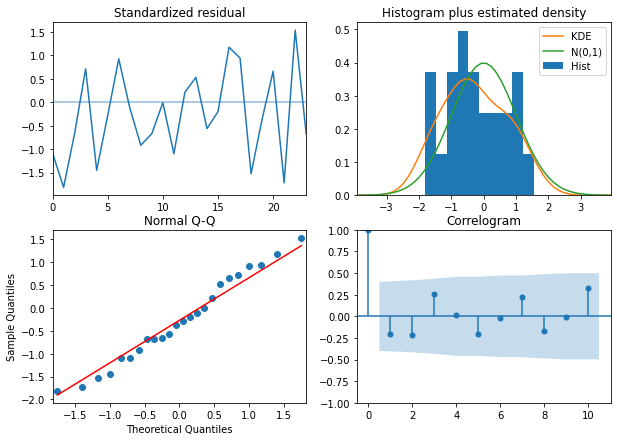

In [30]:
model_autoarima_byweek.plot_diagnostics(figsize=(10,7))
plt.show()

## Forecasting by week

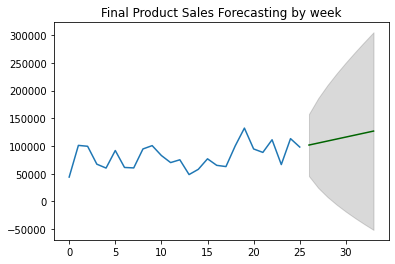

In [31]:
import numpy as np
# Forecast 8 weeks
n_periods = 8
fc, confint = model_autoarima_byweek.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(series_byweek_sales.TOTALPRICE), len(series_byweek_sales.TOTALPRICE)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(series_byweek_sales.TOTALPRICE)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Product Sales Forecasting by week")
plt.show()

## Save the model

In [33]:
import pickle
pickle.dump(model_autoarima_byweek, open("sales_topproduct_by_week.dat", "wb"))

## Transformation (From Here Optional)

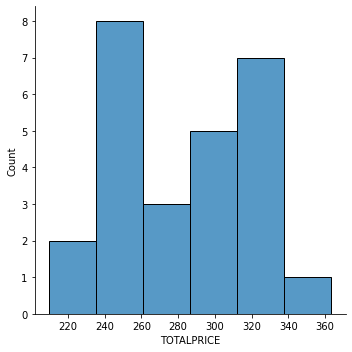

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
series_byweek_sales = pd.read_csv('series_byweek_sales.csv', header = 0)

data_sqrt = np.sqrt(series_byweek_sales['TOTALPRICE'])
sns.displot(data_sqrt)

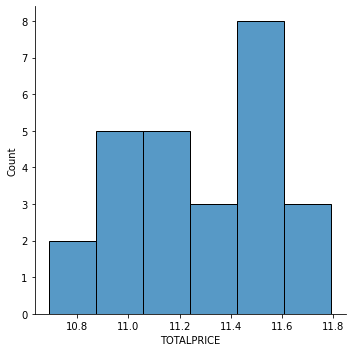

In [35]:
data_log = np.log(series_byweek_sales['TOTALPRICE'])
sns.displot(data_log)

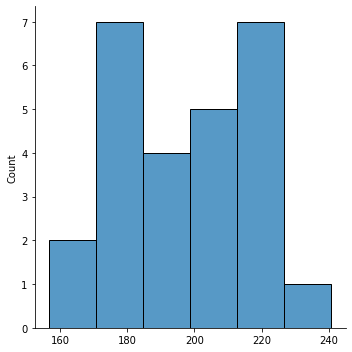

In [36]:
from scipy import stats
data_box, fitted_lambda = stats.boxcox(series_byweek_sales['TOTALPRICE'])

sns.displot(data_box)

# Convert coxbox numpy array to dataframe


In [37]:
series_byweek_sales_numpy=pd.DataFrame(data_box, columns=['TOTALPRICE'])

In [38]:
series_byweek_sales_T = series_byweek_sales

In [39]:
series_byweek_sales_T.update(series_byweek_sales_numpy['TOTALPRICE'])

In [40]:
series_byweek_sales_T

ORDERDATE  TOTALPRICE
0   2017-09-03  156.563501
1   2017-09-10  216.875090
2   2017-09-17  215.523629
3   2017-09-24  184.916288
4   2017-10-01  177.110064
5   2017-10-08  208.918693
6   2017-10-15  178.359901
7   2017-10-22  177.441038
8   2017-10-29  211.376286
9   2017-11-05  216.503255
10  2017-11-12  200.623414
11  2017-11-19  187.960748
12  2017-11-26  193.154303
13  2017-12-03  162.725977
14  2017-12-10  174.440616
15  2017-12-17  194.888911
16  2017-12-24  182.622831
17  2017-12-31  180.162161
18  2018-01-07  215.989068
19  2018-01-14  240.809350
20  2018-01-21  211.376286
21  2018-01-28  205.849196
22  2018-02-04  225.135476
23  2018-02-11  184.165455
24  2018-02-18  226.706775
25  2018-02-25  214.353035

# Evaluate the model with transformed data by week

In [41]:
model_autoarima_byweek_T = pm.auto_arima(series_byweek_sales_T.TOTALPRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoarima_byweek_T.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=248.756, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=245.774, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=246.895, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=236.483, Time=0.29 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=234.355, Time=0.50 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=236.334, Time=1.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=232.389, Time=0.41 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=234.613, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=234.366, Time=0.50 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA

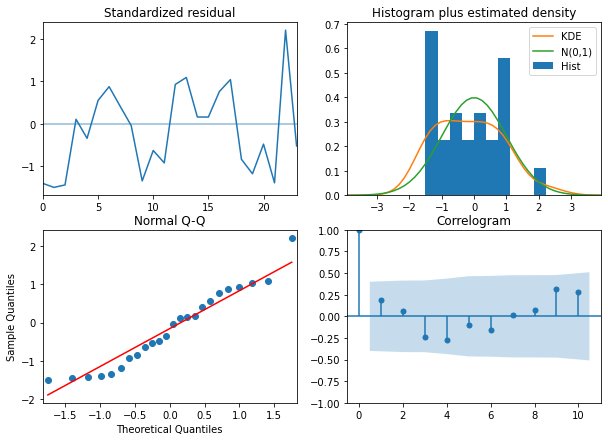

In [42]:
model_autoarima_byweek_T.plot_diagnostics(figsize=(10,7))
plt.show()

## Transforming using SQRT function

In [43]:
series_byweek_sales_sqrt=pd.DataFrame(data_sqrt, columns=['TOTALPRICE'])

In [44]:
series_byweek_sales_T2 = series_byweek_sales

In [45]:
series_byweek_sales_T2.update(series_byweek_sales_sqrt['TOTALPRICE'])

In [46]:
series_byweek_sales_T2

ORDERDATE  TOTALPRICE
0   2017-09-03  209.427792
1   2017-09-10  317.867897
2   2017-09-17  315.328400
3   2017-09-24  259.113875
4   2017-10-01  245.193801
5   2017-10-08  302.985148
6   2017-10-15  247.410590
7   2017-10-22  245.780390
8   2017-10-29  307.564627
9   2017-11-05  317.168725
10  2017-11-12  287.645615
11  2017-11-19  264.590249
12  2017-11-26  273.992701
13  2017-12-03  220.018181
14  2017-12-10  240.474531
15  2017-12-17  277.149779
16  2017-12-24  255.005882
17  2017-12-31  250.615243
18  2018-01-07  316.202467
19  2018-01-14  363.598680
20  2018-01-21  307.564627
21  2018-01-28  297.287739
22  2018-02-04  333.490630
23  2018-02-11  257.767337
24  2018-02-18  336.481797
25  2018-02-25  313.132560

In [47]:
model_autoarima_byweek_T2 = pm.auto_arima(series_byweek_sales_T2.TOTALPRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoarima_byweek_T2.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=277.903, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=274.830, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=276.039, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=265.466, Time=0.19 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=263.513, Time=0.49 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=265.509, Time=1.50 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=261.545, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=263.592, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=263.540, Time=0.89 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA

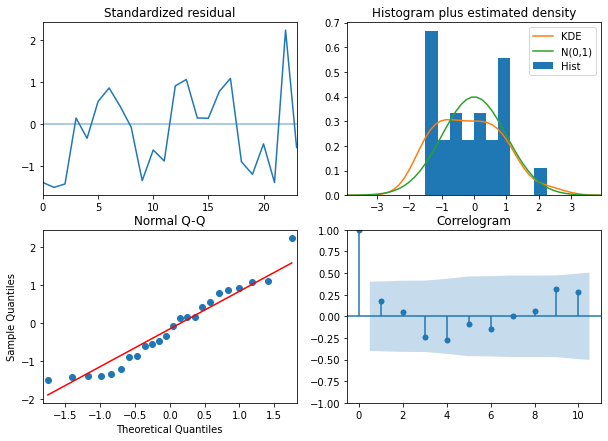

In [48]:
model_autoarima_byweek_T2.plot_diagnostics(figsize=(10,7))
plt.show()